# Pandas Fundamentals with Avocado Prices

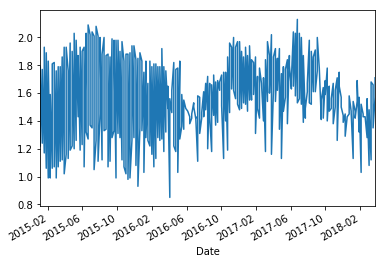

In [66]:
import pandas as pd

df = pd.read_csv("avocado.csv")
df['Date'] = pd.to_datetime(df["Date"])
albany_df = df[ df["region"] == "Albany" ]
albany_df.tail(6).head(2)
albany_df.set_index("Date", inplace = True)
albany_df["AveragePrice"].plot()

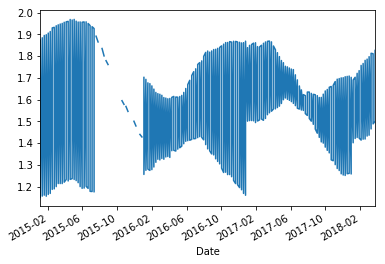

In [67]:
albany_df["AveragePrice"].rolling(25).mean().plot()

In [68]:
albany_df.head(25);

In [69]:
albany_df.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

/home/drew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


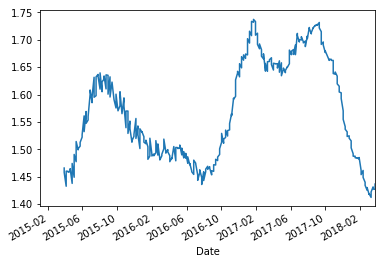

In [70]:
albany_df.sort_index(inplace = True)
albany_df["AveragePrice"].rolling(25).mean().plot()

In [71]:
albany_df['price25ma'] = albany_df["AveragePrice"].rolling(25).mean()
albany_df.head(3)

/home/drew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN


In [72]:
albany_df.dropna();

In [73]:
albany_df = df.copy()[df["region"] == "Albany"]
albany_df.set_index("Date", inplace = True)
albany_df.sort_index(inplace = True)
albany_df['price25ma'] = albany_df["AveragePrice"].rolling(25).mean()

## Goal: Compare "price25ma"'s for all the states

In [76]:
# Pandas gives many functions that can be done (complexly) by python!
s = df.copy()['region'].unique()
t = sorted(list(set(df.copy()['region'].values.tolist())))
(t == s);

In [94]:
all_states = pd.DataFrame


for region in df['region'].unique()[:14]:
    print(region)
    prev_df = df.copy()[df['type'] == 'organic']
    region_df = prev_df.copy()[df['region'] == region]
    region_df.set_index('Date', inplace = True)
    region_df.sort_index(inplace = True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if all_states.empty:
        all_states = region_df[[f'{region}_price25ma']].rename({'price25ma':region})
    else:
        all_states = all_states.join(region_df[[f'{region}_price25ma']].rename({'price25ma':region}))
        
all_states
    

Albany


/home/drew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit


,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,Columbus_price25ma,DallasFtWorth_price25ma,Denver_price25ma,Detroit_price25ma
Date,,,,,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AttributeError: 'AxesSubplot' object has no attribute 'dropna'

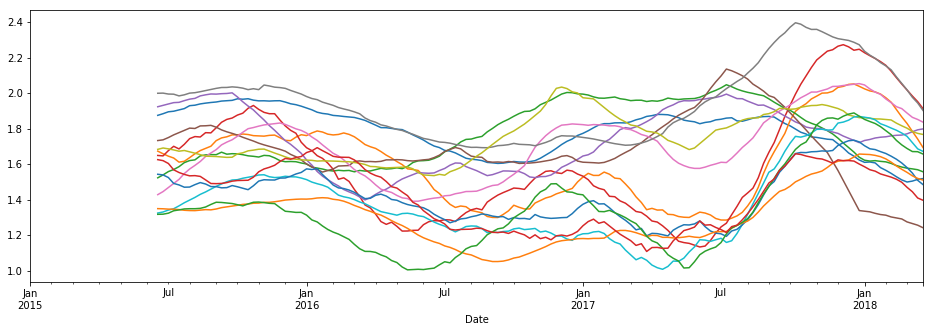

In [97]:
all_states.plot(figsize =(16,5), legend = False).dropna()

In [92]:
prev_df = df.copy()[df['type'] == 'organic']
prev_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.00,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.00,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.00,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.00,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.00,organic,2015,Albany
9131,5,2015-11-22,1.94,858.83,13.84,84.18,0.00,760.81,755.69,5.12,0.00,organic,2015,Albany
9132,6,2015-11-15,1.89,1208.54,20.71,238.16,0.00,949.67,949.67,0.00,0.00,organic,2015,Albany
9133,7,2015-11-08,1.88,1332.27,20.08,351.40,0.00,960.79,960.79,0.00,0.00,organic,2015,Albany
9134,8,2015-11-01,1.88,1021.68,11.47,137.58,0.00,872.63,872.63,0.00,0.00,organic,2015,Albany
9135,9,2015-10-25,1.83,1161.90,49.27,148.96,0.00,963.67,963.67,0.00,0.00,organic,2015,Albany
